# Employee churn analysis using Logistic, RF and SVC models 

# Problem statement
1. The data set is of a firm who wants to understand why some of their best and most experienced employees are leaving the company. 
2. The company also wishes to predict which valuable employees will leave next
3. About the data set - This has 15,000 rows and 10 columns 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sn
import pickle

In [2]:
ds=pd.read_csv('F:\Analytics\Learnings\Python\Pratice data\HR_comma_sep.csv')
ds.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [3]:
# 1. Check data types in dataframe

In [4]:
ds.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [5]:
# 2. Check basic statistics of columns 

In [6]:
ds.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# 3. Check any null values in data set 
#syntax is data frame + isnull()+ sum()

In [8]:
ds.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [9]:
# 4.Check any null values for a particular column in data set 
#syntax is data frame + isnull()+ sum()
#  ds[ds.left.isnull()] is same as ds[ds['left'].isnull()]

In [10]:
ds[ds['left'].isnull()]
ds[ds['salary'].isnull()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


In [11]:
# 5.To study column 'left'  
# describe is used to find details like max,min

In [29]:
ds['left'].describe()

count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

In [30]:
# 6.To study column 'salary'- if there is a null value, we use function like fillna () for filling and drop () to remove he rows

In [31]:
ds['salary'].fillna('low')

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 14999, dtype: int32

In [32]:
# 7.Top ten employee's based on last evaluation

In [33]:
ds.nlargest(10,['last_evaluation'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
8,0.89,1.0,5,224,5,0,1,0,7,1
59,0.85,1.0,4,225,5,0,1,0,9,1
91,0.89,1.0,5,246,5,0,1,0,7,1
99,0.90,1.0,5,221,6,0,1,0,7,2
106,0.91,1.0,4,257,5,0,1,0,2,2
114,0.84,1.0,5,234,5,0,1,0,9,2
122,0.75,1.0,4,216,6,0,1,0,9,1
132,0.90,1.0,5,221,5,0,1,0,8,1
138,0.74,1.0,4,249,5,0,1,0,0,1
156,0.83,1.0,5,240,5,0,1,0,8,1


In [34]:
 # 8. No of rows with employee's having low salary

In [35]:
ds['salary'].value_counts()

1    7316
2    6446
0    1237
Name: salary, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
ds.salary=LabelEncoder().fit_transform(ds.salary)
ds.Department=LabelEncoder().fit_transform(ds.Department)

In [37]:
ds.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2


In [38]:
# 9. Multiple correlation 

In [39]:
 ds.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
Department,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


In [40]:
#10. Reasons why ppl leave- key paramters

In [41]:
ds.corr().left

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Department               0.032105
salary                  -0.001294
Name: left, dtype: float64

In [42]:
# The key reasons why people leave the firm are 
# a. satisfaction level as correlation value is - 0.4
# b. work accident as correlation value is - 0.1

In [43]:
# 11. how many employe has left with more than 75 percentage satisfaction level

In [44]:
m= ds[ (ds['last_evaluation']>=0.75) & (ds["left"]==1) ].left.value_counts()
m

1    1878
Name: left, dtype: int64

In [45]:
 # 12. Drop the department column using drop function

In [28]:
dsdummy=ds.drop("Department",axis=1)
dsdummy.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium


In [29]:
# 13. How many people left the firm in Pie chart

In [46]:
a = ds["left"].value_counts()
a

0    11428
1     3571
Name: left, dtype: int64

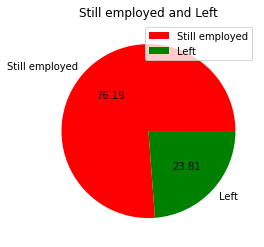

In [47]:
plt.pie(a,colors= ["red","green"],labels=["Still employed","Left"],autopct = "%0.2f")
plt.title("Still employed and Left")
plt.legend(loc="upper right")
plt.show()

In [60]:
# 14. Plot the Correlation matrix

In [61]:
va_corrmatrix=dsl_x.corr()

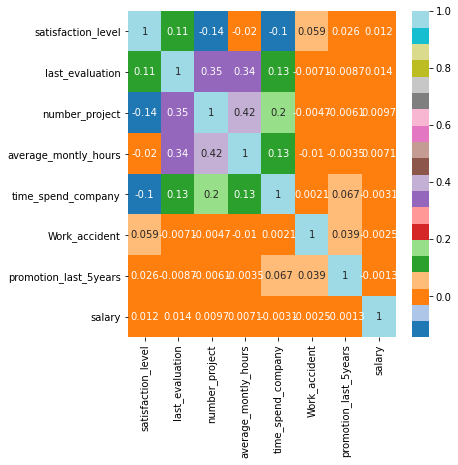

In [62]:
plt.figure(figsize=(6,6)) # to set the size of matrix for better readibity

sn.heatmap(va_corrmatrix,annot=True, cmap='tab20') # cmap is colouring map, while annot is used to put value in cells 
plt.show()

# Graphs and Charts

In [ ]:
# 15. Plot subplot to show number of projects, depetment wise staff ratio, salary structure of employees, promotion status 

In [32]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Projects'}>

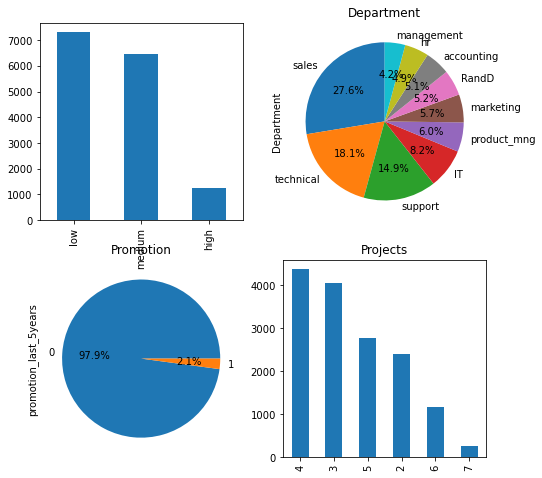

In [33]:
fig,a = plt.subplots(2,2,figsize=(8,8))
ds['salary'].value_counts().plot(kind='bar',ax=a[0][0])
ds['Department'].value_counts().plot(kind='pie',ax=a[0][1],title='Department',autopct='%1.1f%%',startangle=90)
ds['promotion_last_5years'].value_counts().plot(kind='pie',ax=a[1][0],title='Promotion',autopct='%1.1f%%')
ds['number_project'].value_counts().plot(kind='bar',ax=a[1][1],title='Projects')

# Feature engineering  

In [48]:
# Data processing

In [117]:
dsl_y=ds['left']
dsl_y.head(2)

0    1
1    1
Name: left, dtype: int64

In [118]:
dsl_y.dtypes

dtype('int64')

In [119]:
dsl_x=ds.drop(labels=['left','Department','last_evaluation','number_project','average_montly_hours','promotion_last_5years','salary'],axis=1)
dsl_x.head(2)

,satisfaction_level,time_spend_company,Work_accident
0,0.38,3,0
1,0.80,6,0


In [120]:
# Feature scaling

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
sc=StandardScaler()

In [123]:
dsl_x1= sc.fit_transform(dsl_x)
dsl_x1

array([[-0.93649469, -0.34123516, -0.41116529],
       [ 0.75281433,  1.71343614, -0.41116529],
       [-2.02247906,  0.34365527, -0.41116529],
       ...,
       [-0.97671633, -0.34123516, -0.41116529],
       [-2.02247906,  0.34365527, -0.41116529],
       [-0.97671633, -0.34123516, -0.41116529]])

In [124]:
# Split data in to train and test datasets
# Stratify is used to ensure that there is equal mix of 1 or 0 for binary classification during test-train split

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
dsl_x1_train,dsl_x1_test,dsl_y_train,dsy_test = train_test_split(dsl_x1,dsl_y, test_size=0.2, stratify= dsl_y, random_state=2)

# 1.  Development of binary/logistic model

In [80]:
# Defining Logistic regression model

In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [82]:
# Model fitment in training data

In [83]:
m=model.fit(dsl_x1_train,dsl_y_train)

In [84]:
# Testing the model with 'test values'

In [85]:
dsy_predicted= model.predict(dsl_x1_test)

In [86]:
dsy_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [87]:
# Accuracy of model

In [88]:
model.score(dsl_x1_test,dsy_test)

0.7666666666666667

In [89]:
from sklearn import metrics

In [90]:
metrics.accuracy_score(dsy_test,dsy_predicted)

0.7666666666666667

In [91]:
# Confusion matrix

In [92]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(dsy_test,dsy_predicted)
cm

array([[2121,  165],
       [ 535,  179]], dtype=int64)

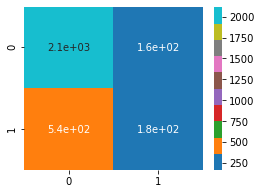

In [93]:
plt.figure(figsize=(4,3))
sn.heatmap(cm,annot=True,cmap='tab10')
plt.xlabel=('Actual')
plt.ylabel=('Predicted')
# Interpretation - 

In [94]:
# Classifction report for for precision, recall f1-score and accuracy

In [95]:
from sklearn.metrics import classification_report

In [96]:
# Precision - Out of all the positive predicted, what percentage is truly positive
# Recall-Out of the total positive, what percentage are predicted positive. It is the same as TPR (true positive rate).
target_names = ['1', '0']
matrix=classification_report(dsy_test,dsy_predicted,target_names=target_names)
print(matrix)

              precision    recall  f1-score   support

           1       0.80      0.93      0.86      2286
           0       0.52      0.25      0.34       714

    accuracy                           0.77      3000
   macro avg       0.66      0.59      0.60      3000
weighted avg       0.73      0.77      0.73      3000



# User testing using Logistic model

In [97]:
satisfaction_level =float(input('Enter the satisfaction level of employee -'))
time_spend =int(input('Enter the number of years the employee is with the company -'))
accidents=int(input('Enter the accidents happened during the work -'))

Enter the satisfaction level of employee -0.6
Enter the number of years the employee is with the company -4
Enter the accidents happened during the work -2


In [98]:
x_new=pd.DataFrame({ 'satisfaction_level':[satisfaction_level],'time_spend_company':[time_spend],'Work_accident':[accidents]})

In [99]:
x_new_trans= sc.transform(x_new)
x_new_trans

array([[-0.05161854,  0.34365527,  5.27538909]])

In [100]:
new_pred=model.predict(x_new_trans)

In [101]:
if new_pred<1: 
    print("Employee will stay with the company")
else:
    print("Employee will leave the company")

Employee will stay with the company


# 2.  Model development  using RandomForrest

In [148]:
# Split data in to train and test datasets
# Stratify is used to ensure that there is equal mix of 1 or 0 for binary classification during test-train split

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
dsl_x1_train,dsl_x1_test,dsl_y_train,dsy_test = train_test_split(dsl_x1,dsl_y, test_size=0.2, stratify= dsl_y, random_state=2)

In [160]:
# Defining the model

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
rfmodel= RandomForestClassifier(criterion='gini',n_estimators =10, random_state=1)

In [ ]:
# Model fitment

In [153]:
rfmodel.fit(dsl_x1_train,dsl_y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [154]:
rf_y_predicted= rfmodel.predict(dsl_x1_test)

In [161]:
# Accuracy checking

In [155]:
from sklearn import metrics

In [157]:
metrics.accuracy_score(dsy_test,rf_y_predicted)

0.9476666666666667

In [158]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(dsy_test,rf_y_predicted)
cm

array([[2197,   89],
       [  68,  646]], dtype=int64)

In [159]:
matrix=classification_report(dsy_test,rf_y_predicted,target_names=target_names)
print(matrix)

              precision    recall  f1-score   support

           1       0.97      0.96      0.97      2286
           0       0.88      0.90      0.89       714

    accuracy                           0.95      3000
   macro avg       0.92      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



# 3.  Model development using SVC

In [148]:
# Split data in to train and test datasets
# Stratify is used to ensure that there is equal mix of 1 or 0 for binary classification during test-train split

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
dsl_x1_train,dsl_x1_test,dsl_y_train,dsy_test = train_test_split(dsl_x1,dsl_y, test_size=0.2, stratify= dsl_y, random_state=2)

In [ ]:
# Defining the model

In [174]:
from sklearn.svm import SVC
svcmodel = SVC()

In [175]:
# Model fitment

In [176]:
svcmodel.fit(dsl_x1_train,dsl_y_train)

SVC()

In [177]:
svc_y_predicted= svcmodel.predict(dsl_x1_test)

In [178]:
# Accuracy checking

In [179]:
from sklearn import metrics

In [180]:
metrics.accuracy_score(dsy_test,svc_y_predicted)

0.9213333333333333

In [182]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(dsy_test,svc_y_predicted)
cm

array([[2142,  144],
       [  92,  622]], dtype=int64)

In [183]:
matrix=classification_report(dsy_test,svc_y_predicted,target_names=target_names)
print(matrix)

              precision    recall  f1-score   support

           1       0.96      0.94      0.95      2286
           0       0.81      0.87      0.84       714

    accuracy                           0.92      3000
   macro avg       0.89      0.90      0.89      3000
weighted avg       0.92      0.92      0.92      3000



# Conclusion

1. Of the all the model, random forrest is providing better accuracy, precision and recall
2. The accuracy of model using random forrest, SVC  and logistic model is 94%, 91% and 76% respectively
3. The key factors affecting churn are-satisfaction_level,time_spend_company,Work_accident
4. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.